In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
cass_java = pd.read_csv("cassandra-java-driver_results/metrics.csv")
cass_java = cass_java.assign(repo=pd.Series(data=["cassandra-java-driver"]*100, index=range(100), name='repo'))
cass_py = pd.read_csv("python-driver_results/metrics.csv")
cass_py = cass_py.assign(repo=pd.Series(data=["cassandra-python-driver"]*100, index=range(100), name='repo'))
mongo_java = pd.read_csv("mongo-java-driver_results/metrics.csv")
mongo_java = mongo_java.assign(repo=pd.Series(data=["mongo-java-driver"]*100, index=range(100), name='repo'))
mongo_py = pd.read_csv("mongo-python-driver_results/metrics.csv")
mongo_py = mongo_py.assign(repo=pd.Series(data=["mongo-python-driver"]*100, index=range(100), name='repo'))
motor_py = pd.read_csv("motor_results/metrics.csv")
motor_py = motor_py.assign(repo=pd.Series(data=["mongo-motor-python-driver"]*100, index=range(100), name='repo'))

avg_lcom_df = pd.concat([
    cass_java[['repo', 'Unnamed: 0', 'avg_lcom', 'avg_ccn', 'complex_method_count']],
    cass_py[['repo', 'Unnamed: 0', 'avg_lcom', 'avg_ccn', 'complex_method_count']],
    mongo_java[['repo', 'Unnamed: 0', 'avg_lcom', 'avg_ccn', 'complex_method_count']],
    mongo_py[['repo', 'Unnamed: 0', 'avg_lcom', 'avg_ccn', 'complex_method_count']],
    motor_py[['repo', 'Unnamed: 0', 'avg_lcom', 'avg_ccn', 'complex_method_count']]
], ignore_index=True)
avg_lcom_df

,repo,Unnamed: 0,avg_lcom,avg_ccn,complex_method_count
0,cassandra-java-driver,v0,0.258709,1.555530,58.0
1,cassandra-java-driver,v1,0.258709,1.555530,58.0
2,cassandra-java-driver,v2,0.258647,1.555573,58.0
3,cassandra-java-driver,v3,0.258647,1.555573,58.0
4,cassandra-java-driver,v4,0.258647,1.555573,58.0
...,...,...,...,...,...
495,mongo-motor-python-driver,v95,0.702381,1.769231,4.0
496,mongo-motor-python-driver,v96,0.702381,1.769231,4.0
497,mongo-motor-python-driver,v97,0.702381,1.761523,4.0
498,mongo-motor-python-driver,v98,0.702381,1.761523,4.0


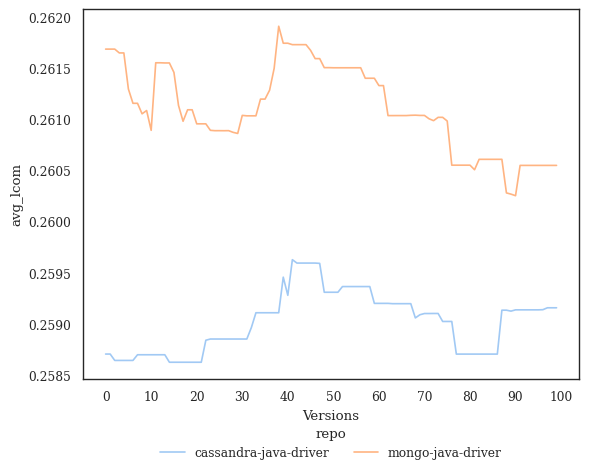

In [3]:
sns.set_theme(style='white', palette="pastel", font="serif")
sns.set_context(context='paper')
# plt = sns.lineplot(data=cass_py, x=cass_py.iloc[:, 0], y=cass_py.iloc[:, 3])
# plt = sns.lineplot(data=mongo_py, x=mongo_py.iloc[:, 0], y=mongo_py.iloc[:, 3])
# plt = sns.lineplot(data=motor_py, x=motor_py.iloc[:, 0], y=motor_py.iloc[:, 3])
plt = sns.lineplot(data=
                   avg_lcom_df[
                       (avg_lcom_df['repo'] == 'cassandra-java-driver') 
                       | (avg_lcom_df['repo'] == 'mongo-java-driver')
                    ], x="Unnamed: 0",y="avg_lcom", hue="repo")
plt.set(xlabel="Versions")
sns.move_legend(plt, "upper center", bbox_to_anchor=(.5, -.1), ncol=5, frameon=False)
plt.axes.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.axes.xaxis.set_major_formatter(ticker.ScalarFormatter())

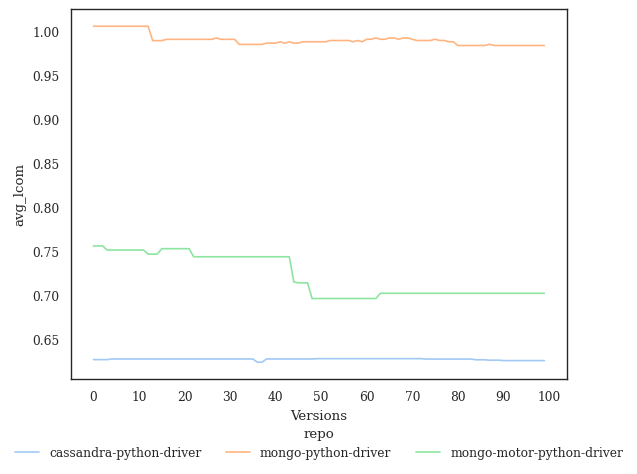

In [4]:
plt = sns.lineplot(data=
                   avg_lcom_df[
                       ~((avg_lcom_df['repo'] == 'cassandra-java-driver') 
                       | (avg_lcom_df['repo'] == 'mongo-java-driver'))
                    ], x="Unnamed: 0",y="avg_lcom", hue="repo")
plt.set(xlabel="Versions")
sns.move_legend(plt, "upper center", bbox_to_anchor=(.5, -.1), ncol=5, frameon=False)
plt.axes.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.axes.xaxis.set_major_formatter(ticker.ScalarFormatter())

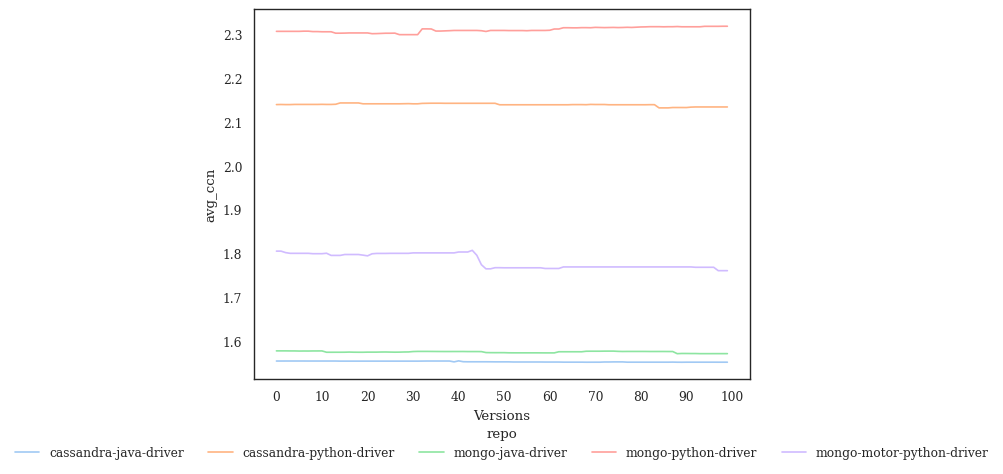

In [5]:
plt = sns.lineplot(data=avg_lcom_df, x="Unnamed: 0",y="avg_ccn", hue="repo")
plt.set(xlabel="Versions")
sns.move_legend(plt, "upper center", bbox_to_anchor=(.5, -.1), ncol=5, frameon=False)
plt.axes.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.axes.xaxis.set_major_formatter(ticker.ScalarFormatter())

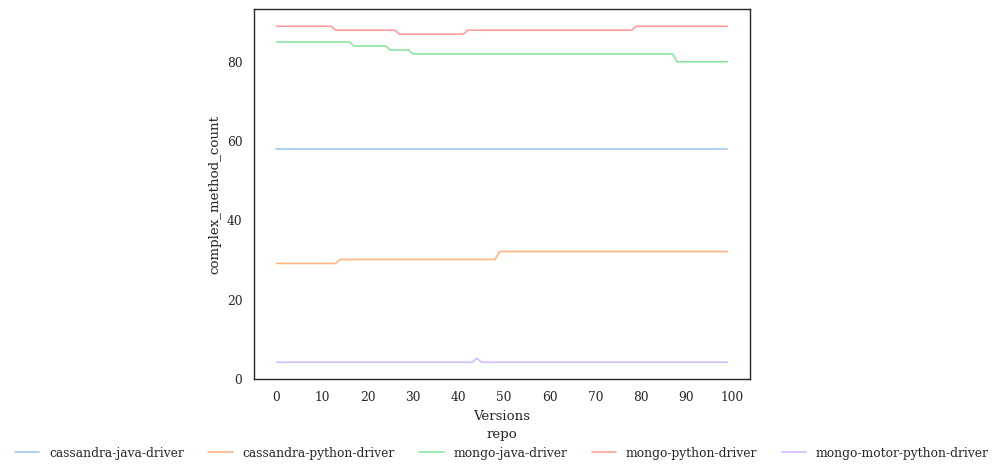

In [6]:
plt = sns.lineplot(data=avg_lcom_df, x="Unnamed: 0",y="complex_method_count", hue="repo")
plt.set(xlabel="Versions")
sns.move_legend(plt, "upper center", bbox_to_anchor=(.5, -.1), ncol=5, frameon=False)
plt.axes.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.axes.xaxis.set_major_formatter(ticker.ScalarFormatter())

In [7]:
large_lcom4 = pd.concat([
    cass_py[['repo', 'Unnamed: 0', 'lcom4_gte_2', 'lcom4_lt_1', 'count']],
    mongo_py[['repo', 'Unnamed: 0', 'lcom4_gte_2', 'lcom4_lt_1', 'count']],
    motor_py[['repo', 'Unnamed: 0', 'lcom4_gte_2', 'lcom4_lt_1', 'count']],
])
large_lcom4

,repo,Unnamed: 0,lcom4_gte_2,lcom4_lt_1,count
0,cassandra-python-driver,v0,124.0,659.0,1343.0
1,cassandra-python-driver,v1,124.0,659.0,1343.0
2,cassandra-python-driver,v2,124.0,659.0,1343.0
3,cassandra-python-driver,v3,124.0,659.0,1343.0
4,cassandra-python-driver,v4,124.0,659.0,1343.0
...,...,...,...,...,...
95,mongo-motor-python-driver,v95,18.0,72.0,168.0
96,mongo-motor-python-driver,v96,18.0,72.0,168.0
97,mongo-motor-python-driver,v97,18.0,72.0,168.0
98,mongo-motor-python-driver,v98,18.0,72.0,168.0


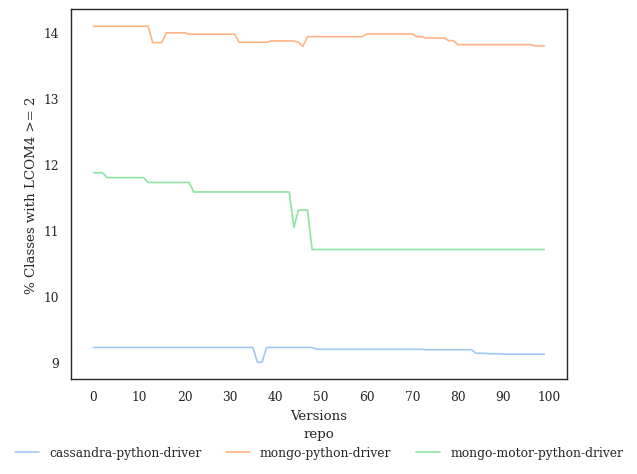

In [12]:
plt = sns.lineplot(data=large_lcom4, x="Unnamed: 0",y=(100 * large_lcom4["lcom4_gte_2"] / large_lcom4["count"]), hue="repo")
plt.set(xlabel="Versions")
plt.set(ylabel="% Classes with LCOM4 >= 2")
sns.move_legend(plt, "upper center", bbox_to_anchor=(.5, -.1), ncol=5, frameon=False)
plt.axes.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.axes.xaxis.set_major_formatter(ticker.ScalarFormatter())

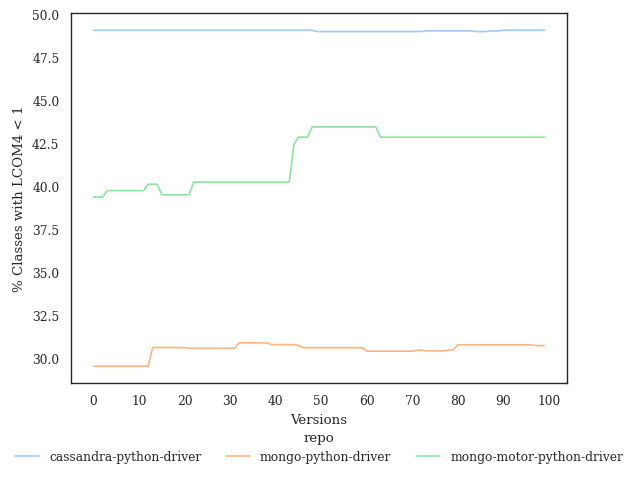

In [13]:
plt = sns.lineplot(data=large_lcom4, x="Unnamed: 0",y=(100 * large_lcom4["lcom4_lt_1"] / large_lcom4["count"]), hue="repo")
plt.set(ylabel="% Classes with LCOM4 < 1")
plt.set(xlabel="Versions")
sns.move_legend(plt, "upper center", bbox_to_anchor=(.5, -.1), ncol=5, frameon=False)
plt.axes.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.axes.xaxis.set_major_formatter(ticker.ScalarFormatter())

In [10]:
large_lcom5 = pd.concat([
    cass_java[['repo', 'Unnamed: 0', 'lcom5_gte_90', 'count']],
    mongo_java[['repo', 'Unnamed: 0', 'lcom5_gte_90', 'count']]
])
large_lcom5

,repo,Unnamed: 0,lcom5_gte_90,count
0,cassandra-java-driver,v0,87.0,2406.0
1,cassandra-java-driver,v1,87.0,2406.0
2,cassandra-java-driver,v2,87.0,2406.0
3,cassandra-java-driver,v3,87.0,2406.0
4,cassandra-java-driver,v4,87.0,2406.0
...,...,...,...,...
95,mongo-java-driver,v95,117.0,2565.0
96,mongo-java-driver,v96,117.0,2565.0
97,mongo-java-driver,v97,117.0,2565.0
98,mongo-java-driver,v98,117.0,2565.0


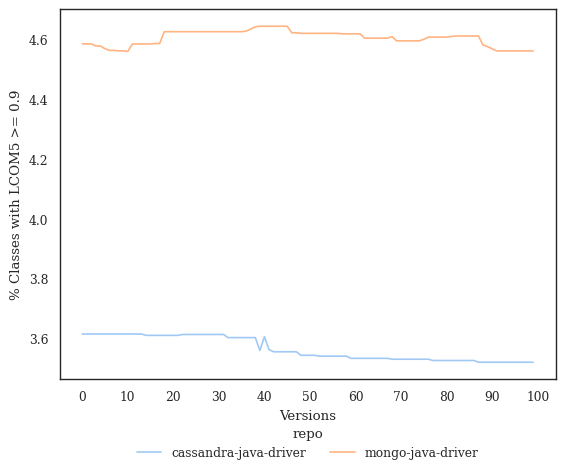

In [14]:
plt = sns.lineplot(data=large_lcom5, x="Unnamed: 0",y=(100 * large_lcom5["lcom5_gte_90"] / large_lcom5["count"]), hue="repo")
plt.set(xlabel="Versions")
plt.set(ylabel="% Classes with LCOM5 >= 0.9")
sns.move_legend(plt, "upper center", bbox_to_anchor=(.5, -.1), ncol=5, frameon=False)
plt.axes.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.axes.xaxis.set_major_formatter(ticker.ScalarFormatter())